# Coaxial Cable Testing

In [25]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sg

In [2]:
#import the data
data = np.loadtxt('WaveData2701.csv',delimiter=',')

In [40]:
c = 300e6  #speed of light
clen = 152.4 #length of the coax
f_low = 65e6 #lower frequency limit
f_high = 95e6 #upper frequency limit
t_chirp = 1000e-6
fs = 1 / (data[1,0] - data[0,0])
freqslope = (f_high - f_low)/t_chirp
vf = 0.83 #coax velocity factor


#Theoredical result for comparison

#generate a hann window
window = np.hanning(t_chirp*fs)

t = np.arange(0, t_chirp, 1/fs)
chirp = np.sin(2*np.pi*(freqslope/2*t**2 + f_low*t)) * window

#extend the arrays, and then multiply to "dechirp"
tx_chirp = np.concatenate((chirp, np.zeros(int(clen/c/vf*fs))))
rx_chirp = np.concatenate((np.zeros(int(clen/c/vf*fs)), chirp))
dechirp = tx_chirp * rx_chirp

#filter the IF
b, a = sg.butter(2, 50e3, 'low', fs=fs)
dechirp = sg.lfilter(b, a, dechirp)
dechirp = dechirp/np.amax(dechirp)

In [4]:
# fig1 = plt.figure()
# plt.plot(data[:,1])
# plt.title("Raw De-chirp")

<IPython.core.display.Javascript object>


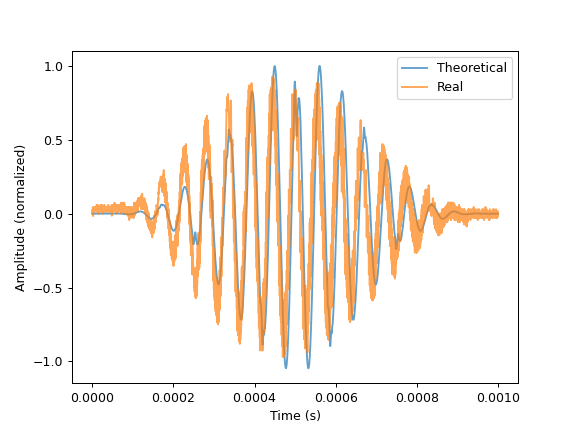

In [41]:
#grab just the chirp
tstart = 7360

tnew = np.arange(0,len(dechirp)/fs,1/fs)
signal = data[tstart:tstart+len(tnew),1]
signal = (signal - np.mean(signal))/np.amax(signal)


fig2 = plt.figure()

plt.plot(tnew,dechirp,alpha=0.7)
plt.plot(tnew,signal,alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (normalized)")
plt.legend(["Theoretical", "Real"])

<IPython.core.display.Javascript object>


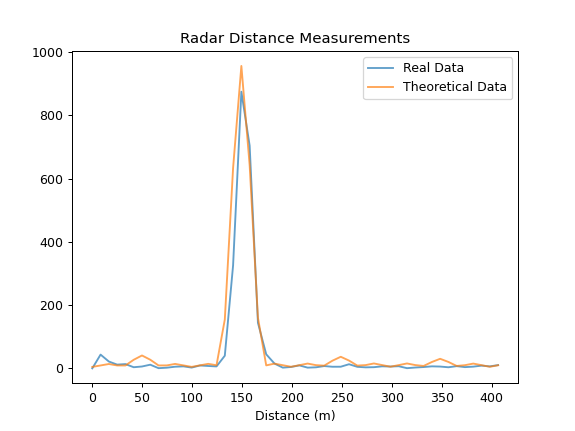

Estimated Coax Length: 149.31041375174897m


In [43]:
#plot an FFT of the dechirped signal
ft = np.abs(np.fft.fftshift(np.fft.fft(signal)))
ft_ideal = np.abs(np.fft.fftshift(np.fft.fft(dechirp)))
freqs = np.fft.fftshift(np.fft.fftfreq(len(signal), 1/fs))/freqslope*c*vf
fig3,axs3 = plt.subplots(1,1)
siglen = int(len(freqs)/2)
freqspan = 50
axs3.plot(freqs[siglen:siglen+freqspan], ft[siglen:siglen+freqspan], alpha=0.7)
axs3.plot(freqs[siglen:siglen+freqspan], ft_ideal[siglen:siglen+freqspan], alpha=0.7)
axs3.set_xlabel("Distance (m)")
plt.title("Radar Distance Measurements")
plt.legend(["Real Data","Theoretical Data"])
print("Estimated Coax Length: " + str(freqs[siglen:][np.argmax(ft[siglen:])]) + "m")